# **Providing data-driven suggestions for HR**
# **Employee attrition prediction**

### Business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees and would like to know what’s likely to make the employee leave the company.

In this project, I build a model that predicts whether or not an employee will leave the company and identify factors that contribute to their leaving.

### HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

**Source:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
# Import packages

# Standard operational package imports.
import numpy as np
import pandas as pd

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Gather descriptive statistics about the data
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Simplify and standardize column names
df0.rename(columns={'satisfaction_level':'satisfaction', 'last_evaluation':'evaluation', 'number_project':'projects', 
                    'average_montly_hours':'avg_hours', 'time_spend_company':'tenure', 'Work_accident':'accident',
                   'promotion_last_5years':'promotion','Department':'department'}, inplace=True)

# Display all column names after the update
df0.columns

Index(['satisfaction', 'evaluation', 'projects', 'avg_hours', 'tenure',
       'accident', 'left', 'promotion', 'department', 'salary'],
      dtype='object')

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction    0
evaluation      0
projects        0
avg_hours       0
tenure          0
accident        0
left            0
promotion       0
department      0
salary          0
dtype: int64

In [8]:
# Check for duplicates
duplicate_rows = df0[df0.duplicated(keep=False)]
duplicate_rows

,satisfaction,evaluation,projects,avg_hours,tenure,accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
# Inspect some rows containing duplicates
sorted_duplicate_rows = duplicate_rows.sort_values(by=['satisfaction', 'evaluation', 'projects', 'avg_hours', 'tenure', 'accident', 'left', 'promotion', 'department', 'salary'])
sorted_duplicate_rows

,satisfaction,evaluation,projects,avg_hours,tenure,accident,left,promotion,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
13586,1.00,0.93,5,167,3,0,0,0,sales,medium
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [10]:
# Drop duplicates and save resulting dataframe in a new variable
df = df0.drop_duplicates()

# Display first few rows of new dataframe
df.head()

,satisfaction,evaluation,projects,avg_hours,tenure,accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

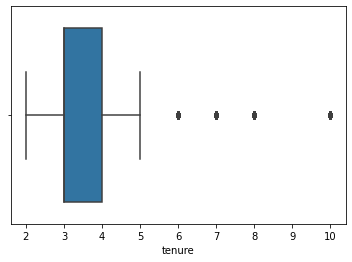

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df['tenure'])


In [12]:
# Determine the number of rows containing outliers
#Calculate the IQR for the 'tenure' column
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

#Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Use boolean indexing to identify outliers
outliers = (df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)

#Count the number of rows containing outliers
num_outliers = outliers.sum()
num_outliers

824

# Continued EDA and Analysis

In [13]:
# Get numbers of people who left vs. stayed
# Count the number of 1s (people who left)
num_left = df['left'].sum() 
# Number of people who stayed (left=0)
num_stayed = len(df) - num_left

print("Number of people who left:", num_left)
print("Number of people who stayed:", num_stayed)

#Calculate the percentages
total_people = len(df)
percent_left = (num_left / total_people) * 100
percent_stayed = (num_stayed / total_people) * 100

print("Percentage of people who left:", percent_left, "%")
print("Percentage of people who stayed:", percent_stayed, "%")



Number of people who left: 1991
Number of people who stayed: 10000
Percentage of people who left: 16.604119756484028 %
Percentage of people who stayed: 83.39588024351598 %


### Data visualizations

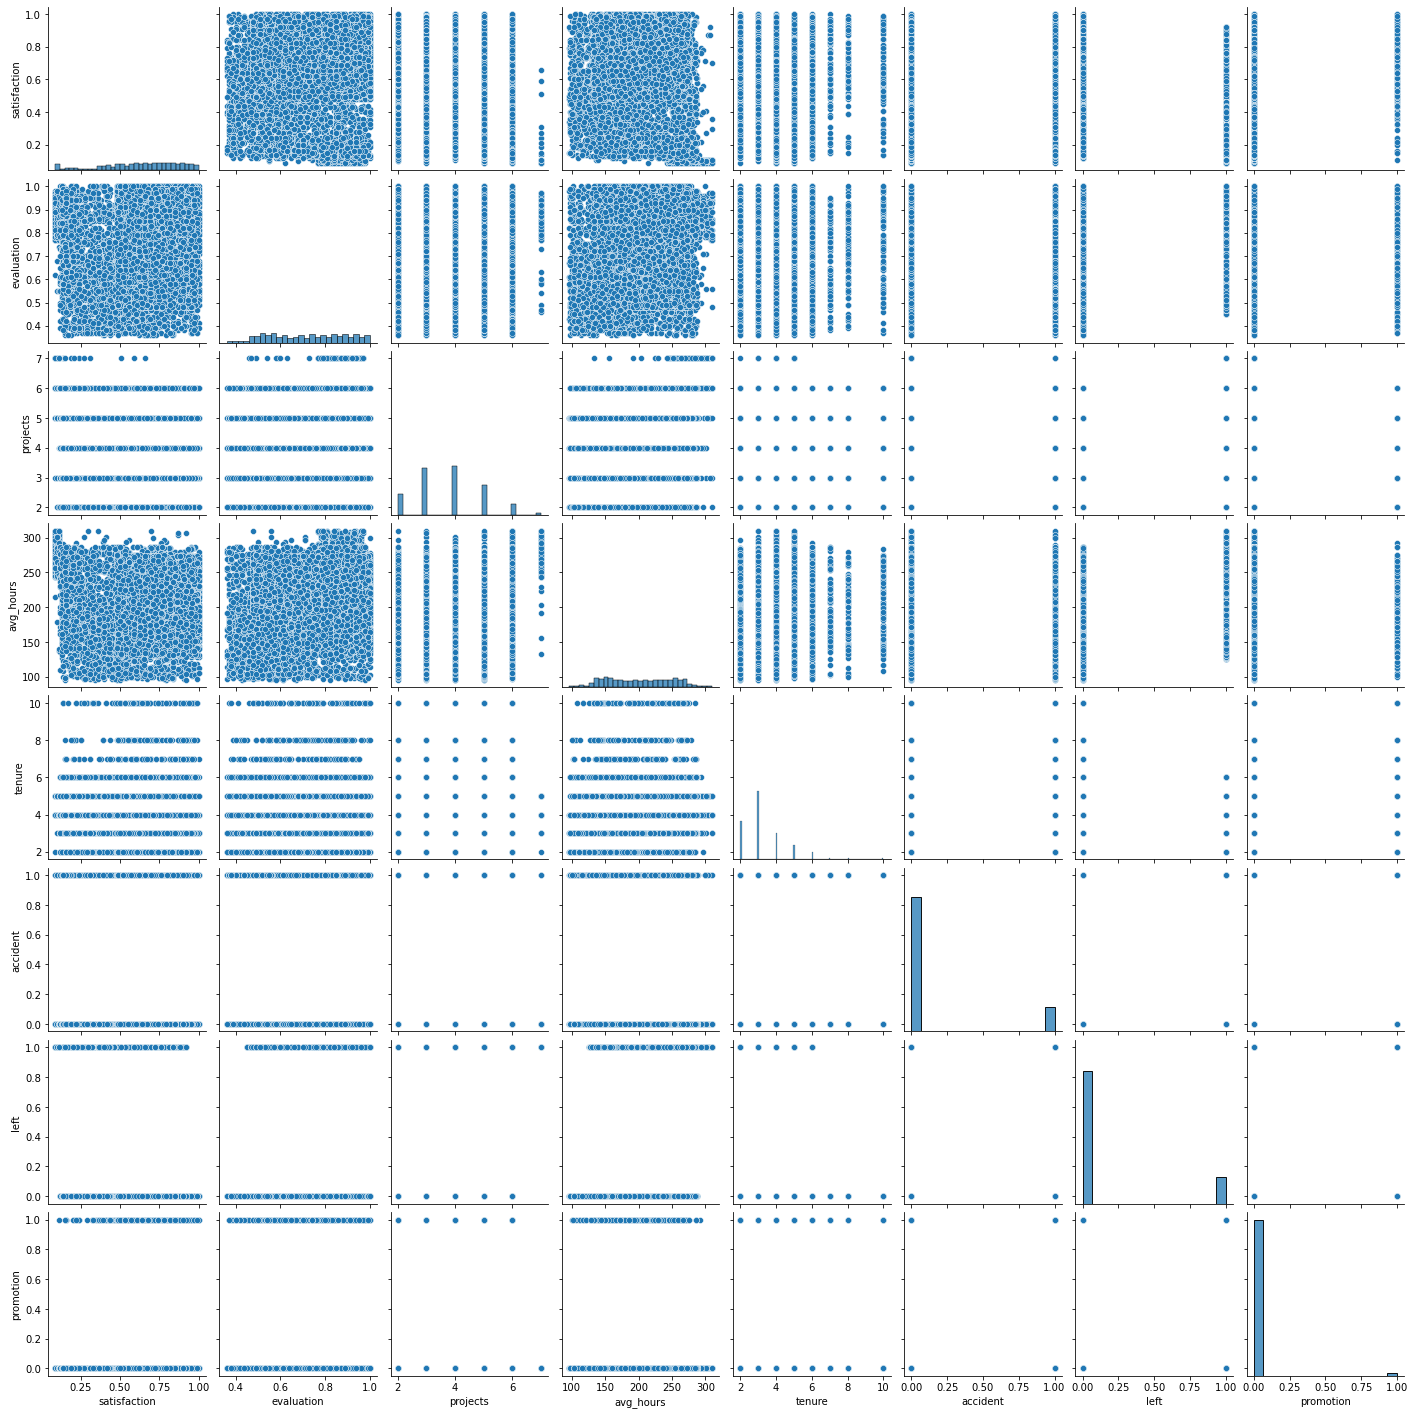

In [14]:
# Overview of relationships between variables
sns.pairplot(df)

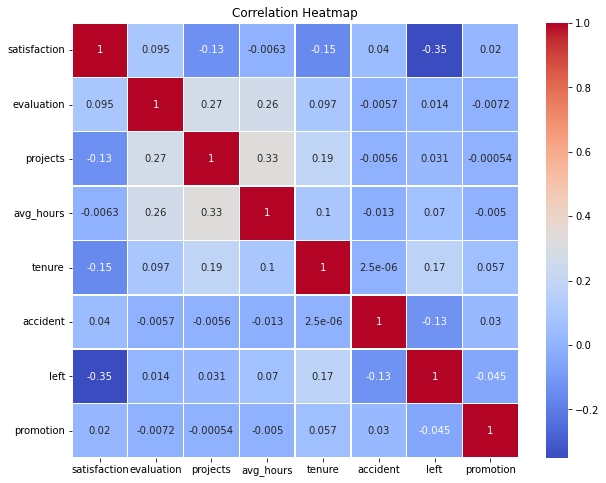

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Examine frequency of promotions
df['promotion'].value_counts()

0    11788
1      203
Name: promotion, dtype: int64

In [17]:
# Examine all sales departments and how many employees from each department
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

Text(0.5, 1.0, 'Number of projects by left status')

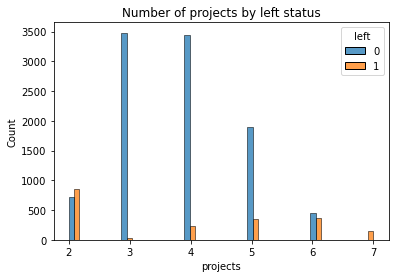

In [18]:
#Plot histogram of number of projects by left status
ax = sns.histplot(data=df, x='projects', 
                  hue='left', 
                  multiple='dodge')
plt.title('Number of projects by left status')

Text(0.5, 1.0, 'Satisfaction scores by left status')

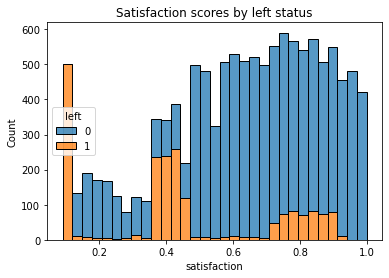

In [19]:
#Plot histogram of satisfaction scores by left status
ax = sns.histplot(data=df, x='satisfaction', 
                  hue='left', 
                  multiple='stack')
plt.title('Satisfaction scores by left status')

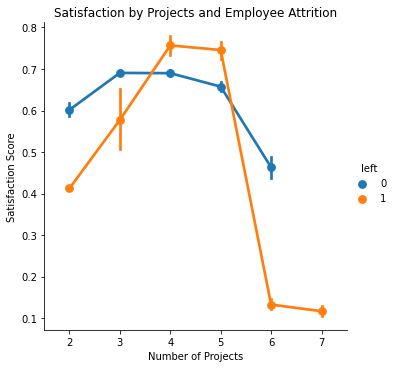

In [20]:
# Create a categorical plot (catplot) shoeing satisfaction by projects and employee left status
sns.catplot(x="projects", y="satisfaction", hue="left", data=df, kind="point")
plt.title("Satisfaction by Projects and Employee Attrition")
plt.xlabel("Number of Projects")
plt.ylabel("Satisfaction Score")
plt.show()

Text(0.5, 1.0, 'Average Monthly Hours by left status')

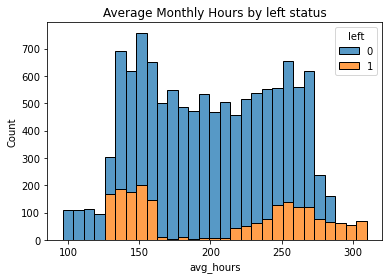

In [21]:
# Plot histogram of average monthly hours by left status
ax = sns.histplot(data=df, x='avg_hours', 
                  hue='left', 
                  multiple='stack')
plt.title('Average Monthly Hours by left status')

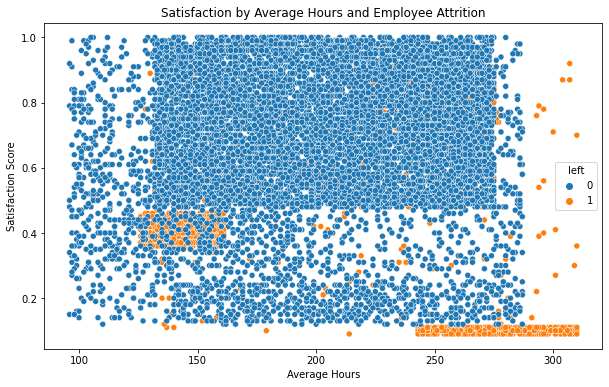

In [22]:
# Create a scatter plot of satisfaction scores by average hours and left status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_hours', y='satisfaction', hue='left', data=df)
plt.title("Satisfaction by Average Hours and Employee Attrition")
plt.xlabel("Average Hours")
plt.ylabel("Satisfaction Score")
plt.show()

Text(0.5, 1.0, 'Evaluation score by left status')

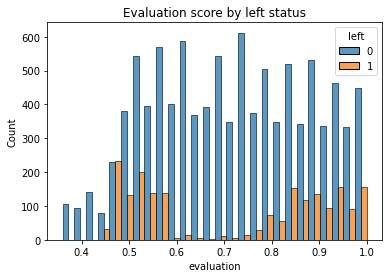

In [23]:
#Plot histogram of evaluation scores by left status
ax = sns.histplot(data=df, x='evaluation', 
                  hue='left', 
                  multiple='dodge')
plt.title('Evaluation score by left status')

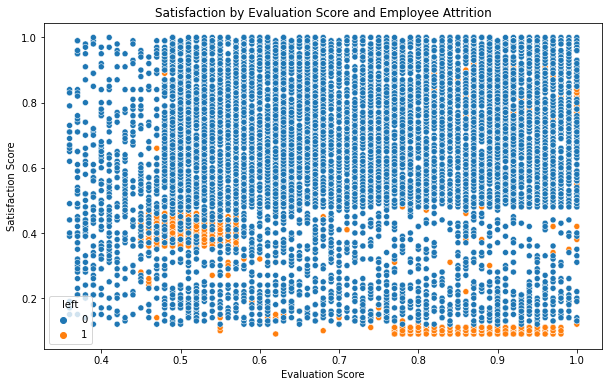

In [24]:
# Create a scatter plot of evaluation scores and satisfaction scores by left status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='evaluation', y='satisfaction', hue='left', data=df)
plt.title("Satisfaction by Evaluation Score and Employee Attrition")
plt.xlabel("Evaluation Score")
plt.ylabel("Satisfaction Score")
plt.show()

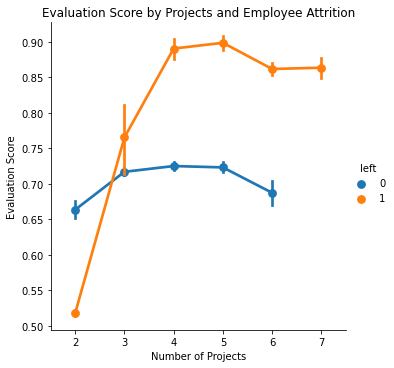

In [25]:
# Create a categorical plot of evaluation score by number of projects and left status
sns.catplot(x="projects", y="evaluation", hue="left", data=df, kind="point")
plt.title("Evaluation Score by Projects and Employee Attrition")
plt.xlabel("Number of Projects")
plt.ylabel("Evaluation Score")
plt.show()

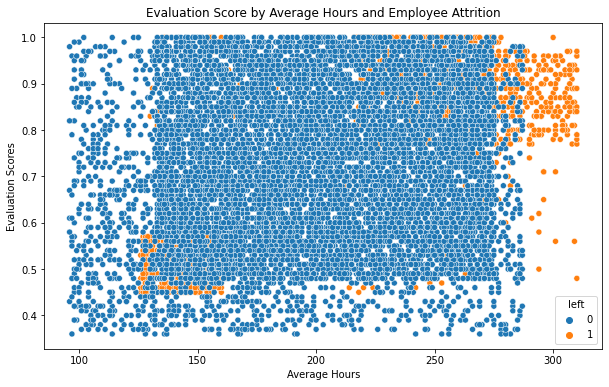

In [26]:
# Create a scatter plot of evaluation score by avergae hours and left status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_hours', y='evaluation', hue='left', data=df)
plt.title("Evaluation Score by Average Hours and Employee Attrition")
plt.xlabel("Average Hours")
plt.ylabel("Evaluation Scores")
plt.show()

### Insights

There was some multicollinearity among the potential dependent variables with number of projects, average monthly hours, and evaluation scores all weakly correlated with each other. 

Satisfaction is generally skewed towards higher values, however there is a spike at the lowest value (close to 0). Extreme satisfaction scores were associated with leaving (few employees with very low satisfaction scores staying and few employees with very high satisfaction scores leaving). However, there were some interesting spikes in leaving clustered around three satisfaction score ratings – all leaving close to .1, the second highest proportion leaving for those with scores near .4 and a slight increase in leaving for those with satisfaction scores between .7 and .9. 
Those with satisfaction scores clustered around .4 that left had lower (although not the lowest) average monthly hours and evaluation scores and only two projects. It is possible that these employees were fired, but they also might have been disengaged and left voluntarily. 

Projects were skewed toward the lower range with most employees having 3-4 projects. Those with the highest and lowest number of projects were more likely to leave with all employees having seven projects leaving. Satisfaction dropped sharply for employees with more than five projects. 

Average monthly hours were fairly evenly distributed between 140 and 170 hours but dropped sharply beyond those limits. Extremes of monthly hours were associated with leaving. Those with the lowest average monthly hours were more likely to stay while those with the highest monthly hours were more likely to leave. 

Evaluation scores are fairly evenly distributed across the range for evaluation scores .5 and higher with few scores below 4.5. Those with the lowest evaluation scores (and those in a mid range between .6 and .75) are more likely to stay. Those with high evaluation scores, working more than about 275 hours and with very low satisfaction scores were most likely to leave.

Tenure was skewed towards the lower range with most employed for 3-4 years and outliers up to 10 years. Those employed more than 6 years were more likely to stay. Promotions and accidents were infrequent (promotions even more so than accidents).


# Model Construction

Because of potentially informative outliers, some multicollinearity, and nonlinear relationships between the predictor variables and outcome variables, I chose to build machine models (classification) rather than using logistic regression analysis. The classes are imbalanced, but not severely, so I chose not to rebalance the data (planning to re-evaluate if the models have trouble detecting the left class). I decided to build and compare results for decision tree, random forest and XGBoost classification models. 

In [27]:
#Get dummies to encode categorical variables.
df1 = pd.get_dummies(df, drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            11991 non-null  float64
 1   evaluation              11991 non-null  float64
 2   projects                11991 non-null  int64  
 3   avg_hours               11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   accident                11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion               11991 non-null  int64  
 8   department_RandD        11991 non-null  uint8  
 9   department_accounting   11991 non-null  uint8  
 10  department_hr           11991 non-null  uint8  
 11  department_management   11991 non-null  uint8  
 12  department_marketing    11991 non-null  uint8  
 13  department_product_mng  11991 non-null  uint8  
 14  department_sales        11991 non-null

In [28]:
# Separate the dataset into labels (y) and features (X).
y = df1['left']
X = df1.drop('left', axis=1)

# Separate into train, validate, test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0, stratify=y_train)

In [29]:
# Instantiate the classifier
decision_tree = DecisionTreeClassifier(random_state = 42)

# Assign a dictionary of hyperparameters to search over
tree_para = {'max_depth':[2,4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50]}

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}


In [30]:
%%time
# Instantiate the GridSearch
clf_dt = GridSearchCV(decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

# Fit the model
clf_dt.fit(X_tr, y_tr)

CPU times: user 5.6 s, sys: 4.83 ms, total: 5.6 s
Wall time: 5.61 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20,


In [31]:
# Examine the best model from GridSearch
clf_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [32]:
print("Best Avg. Validation Score: ", "%.4f" % clf_dt.best_score_)

Best Avg. Validation Score:  0.9489


In [33]:
#Create helper function to return scores from the grid search
def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy
                        },
                        ignore_index=True
                       )
  
    return table

In [34]:
#Return results for the cross-validated decision tree model
result_table = make_results("Decision Tree CV", clf_dt)
result_table

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree CV,0.948901,0.924107,0.975427,0.98354


In [35]:
# Get scores on validation data
dt_preds = clf_dt.best_estimator_.predict(X_val)

In [36]:
#Create function to get all the scores from a model's predictions.
def get_test_scores(model_name:str, preds, y_test_data):
    
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                        'F1': [f1],
                        'Recall': [recall],
                        'Precision': [precision],
                        'Accuracy': [accuracy]
                        })

    return table

In [37]:
# Get results on validation data
dt_val_scores = get_test_scores('Decision Tree test', dt_preds, y_val)
result_table = pd.concat([result_table, dt_val_scores], axis=0)
result_table

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree CV,0.948901,0.924107,0.975427,0.983540
0,Decision Tree test,0.934081,0.892761,0.979412,0.979102


In [38]:
#Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)
#Create a dictionary of hyperparameters to tune 
cv_params = {'n_estimators' : [300,400], 
              'max_depth' : [4,6],        
              'min_samples_leaf' : [1], 
              'min_samples_split' : [2],
              'max_features' : ["sqrt"], 
              'max_samples' : [.7,.9]}
#Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}
#Instantiate the GridSearchCV object
clf_rf = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [39]:
%%time
clf_rf.fit(X_tr, y_tr)

CPU times: user 35.3 s, sys: 145 ms, total: 35.4 s
Wall time: 35.4 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [40]:
# Examine best parameters
clf_rf.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [41]:
# Examine best score
clf_rf.best_score_

0.8916717518597312

In [42]:
# Get results for Random Forest Model CV
rf_results = make_results("Random Forest CV", clf_rf)
result_table = pd.concat([result_table, rf_results], axis=0)
result_table

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree CV,0.948901,0.924107,0.975427,0.983540
0,Decision Tree test,0.934081,0.892761,0.979412,0.979102
0,Random Forest CV,0.891672,0.820536,0.976571,0.966932


In [43]:
# Get scores on validation data
rf_preds = clf_rf.best_estimator_.predict(X_val)

In [44]:
# Get results on validation data
rf_val_scores = get_test_scores('Random Forest test', rf_preds, y_val)
result_table = pd.concat([result_table, rf_val_scores], axis=0)
result_table

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree CV,0.948901,0.924107,0.975427,0.983540
0,Decision Tree test,0.934081,0.892761,0.979412,0.979102
0,Random Forest CV,0.891672,0.820536,0.976571,0.966932
0,Random Forest test,0.877612,0.788204,0.989899,0.963539


In [45]:
#Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
#Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,6], 
             'min_child_weight': [3,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [300,400]
             } 
#Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}
#Instantiate the GridSearchCV object
clf_xgb = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [46]:
%%time
clf_xgb.fit(X_tr, y_tr)

CPU times: user 5min 52s, sys: 1.77 s, total: 5min 54s
Wall time: 2min 57s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated

In [47]:
# Examine best parameters
clf_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 300}

In [48]:
# Examine best score
clf_xgb.best_score_

0.9458606032236864

In [49]:
# Get results for XGBoost model CV
xgb_results = make_results("XGBoost CV", clf_xgb)
result_table = pd.concat([result_table, xgb_results], axis=0)
result_table

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree CV,0.948901,0.924107,0.975427,0.983540
0,Decision Tree test,0.934081,0.892761,0.979412,0.979102
0,Random Forest CV,0.891672,0.820536,0.976571,0.966932
0,Random Forest test,0.877612,0.788204,0.989899,0.963539
0,XGBoost CV,0.945861,0.923214,0.969890,0.982502


In [50]:
# Get scores on validation data
xgb_preds = clf_xgb.best_estimator_.predict(X_val)

In [51]:
# Get results on validation data
xgb_val_scores = get_test_scores('XGBoost test', xgb_preds, y_val)
result_table = pd.concat([result_table, xgb_val_scores], axis=0)
result_table

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree CV,0.948901,0.924107,0.975427,0.983540
0,Decision Tree test,0.934081,0.892761,0.979412,0.979102
0,Random Forest CV,0.891672,0.820536,0.976571,0.966932
0,Random Forest test,0.877612,0.788204,0.989899,0.963539
0,XGBoost CV,0.945861,0.923214,0.969890,0.982502
0,XGBoost test,0.931276,0.890080,0.976471,0.978213


In [52]:
# Get scores on test data for champion decision tree model
dt_preds_test = clf_dt.best_estimator_.predict(X_test)

In [53]:
# Get results on test data
dt_test_scores = get_test_scores('Decision Tree final test', dt_preds_test, y_test)
result_table = pd.concat([result_table, dt_test_scores], axis=0)
result_table

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree CV,0.948901,0.924107,0.975427,0.983540
0,Decision Tree test,0.934081,0.892761,0.979412,0.979102
0,Random Forest CV,0.891672,0.820536,0.976571,0.966932
0,Random Forest test,0.877612,0.788204,0.989899,0.963539
0,XGBoost CV,0.945861,0.923214,0.969890,0.982502
0,XGBoost test,0.931276,0.890080,0.976471,0.978213
0,Decision Tree final test,0.945304,0.919679,0.972399,0.982322


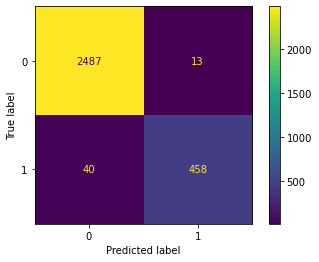

In [54]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,dt_preds_test)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_dt.classes_)
disp.plot(values_format='')

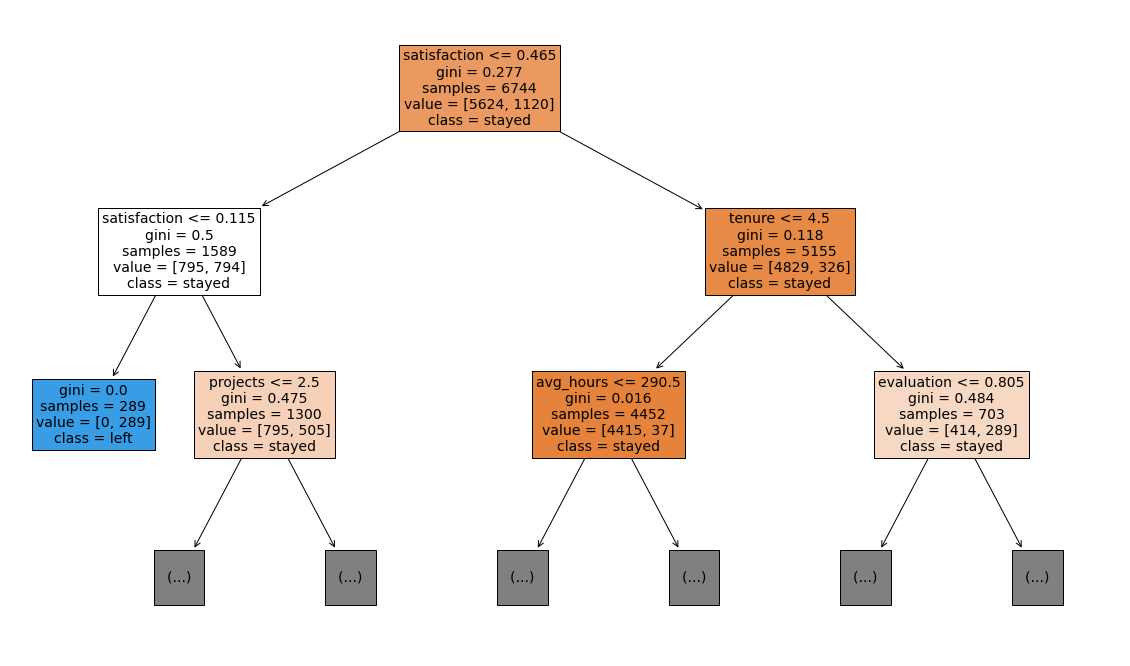

In [55]:
# Plot decision tree
plt.figure(figsize=(20,12))
plot_tree(clf_dt.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns, class_names={0:'stayed', 1:'left'}, filled=True);

Text(0.5, 1.0, 'Feature Importances for Predicting Employee Attrition')

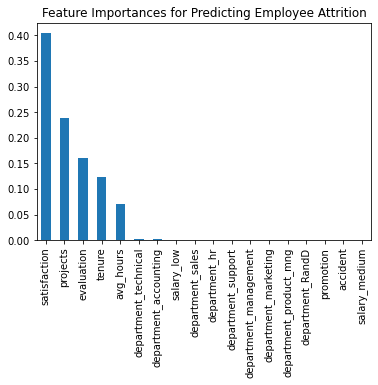

In [56]:
# Plot feature importances
importances = clf_dt.best_estimator_.feature_importances_

dt_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
plt.title('Feature Importances for Predicting Employee Attrition')
dt_importances.plot.bar(ax=ax)
ax.set_title('Feature Importances for Predicting Employee Attrition')

## Results and Evaluation

### Summary of model results

The strongest Decision Tree model fits the data well with an F1 score of .945 on the test data. It classifies with 98% accuracy and has a good balance between false positives and false negatives (precision score: .972, recall score: .912), although false negatives are more common. It performed well on training, validation, and test data indicating that overfitting is not a concern. 

Satisfaction scores were the strongest predictor of whether an employee would leave or not followed by number of projects, evaluation scores,  tenure, and monthly average hours.


### Conclusion and Recommendation

The developed model is a good predictor for employees likely to leave. There is high confidence that an employee predicted to leave will actually leave although the model does miss a small number of employees who are likely to leave.

Satisfaction scores were the strongest predictor of whether or not an employee would leave. All employees with satisfaction scores near zero left. Employees with low satisfaction scores, high average number of hour (more than 275) and high evaluation scores were particularly vulnearable to leaving. Satisfaction scores dropped sharply and likelihood of leaving increased dramatically for employees with more than five projects.

Supervisors should examine employee workload. Three to five projects per employee appears optimal and supervisors should monitor and intervene for employees working more than 250 hours monthly. 

The satisfaction metric should be examined to see if there is more detailed data from the measurement tool that can identify additional causes of dissatisfaction. If not, such a tool should be located or developed to get more information about potential strategies to improve satisfaction. 

Strategies to increase satisfaction might have the most impact during their first five years, when employees are more likely to leave.